### 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
pip install pandas textblob


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv("Elon_musk.csv", encoding='latin1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [7]:
df['Sentiment'] = df['Text'].apply(analyze_sentiment)


In [8]:
print(df[['Text', 'Sentiment']])

                                                   Text Sentiment
0                                @kunalb11 Im an alien  Negative
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...   Neutral
2                   @joerogan @Spotify Great interview!  Positive
3                       @gtera27 Doge is underestimated   Neutral
4     @teslacn Congratulations Tesla China for amazi...  Positive
...                                                 ...       ...
1994  @flcnhvy True, it sounds so surreal, but the n...  Positive
1995  @PPathole Make sure to read ur terms &amp; con...  Positive
1996                @TeslaGong @PPathole Samwise Gamgee   Neutral
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...  Negative
1998                          Progress update August 28   Neutral

[1999 rows x 2 columns]


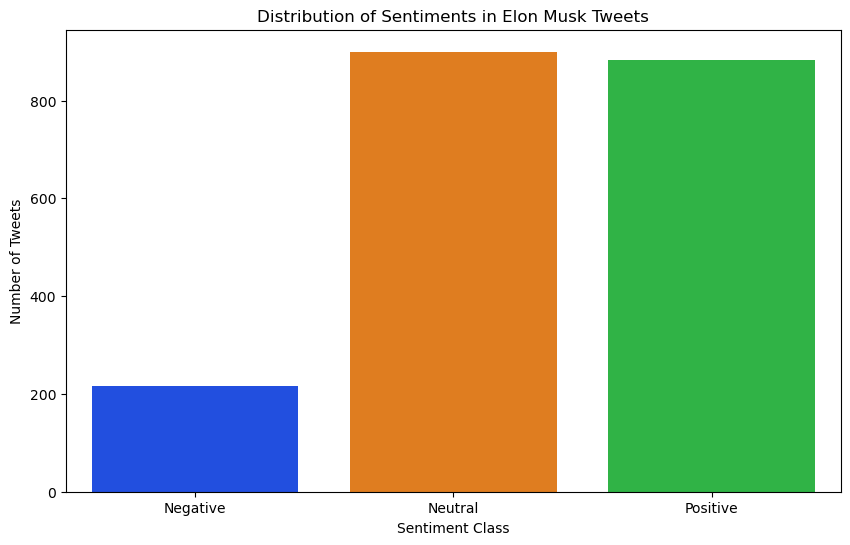

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='bright')
plt.title('Distribution of Sentiments in Elon Musk Tweets')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.show()


In [12]:
total_tweets = len(df)
positive_tweets = len(df[df['Sentiment'] == 'Positive'])
negative_tweets = len(df[df['Sentiment']== 'Negative'])
neutral_tweets = len(df[df['Sentiment'] == 'Neutral'])

In [13]:
print(f"Total number of tweets: {total_tweets}")
print(f"Number of positive tweets: {positive_tweets} ({(positive_tweets / total_tweets) * 100:.2f}%)")
print(f"Number of negative tweets: {negative_tweets} ({(negative_tweets / total_tweets) * 100:.2f}%)")
print(f"Number of neutral tweets: {neutral_tweets} ({(neutral_tweets / total_tweets) * 100:.2f}%)")

Total number of tweets: 1999
Number of positive tweets: 883 (44.17%)
Number of negative tweets: 216 (10.81%)
Number of neutral tweets: 900 (45.02%)


### 2) Extract reviews of any product from ecommerce website like amazon

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
link="https://www.flipkart.com/motorola-edge-40-neo-caneel-bay-256-gb/p/itm55813a9671489?pid=MOBGQFX6APUFAPMS&lid=LSTMOBGQFX6APUFAPMSU240FX&marketplace=FLIPKART&q=mobiles&store=tyy%2F4io&srno=s_1_1&otracker=AS_Query_TrendingAutoSuggest_8_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_8_0_na_na_na&fm=Search&iid=689e5f48-76da-4997-ba0c-83095071b976.MOBGQFX6APUFAPMS.SEARCH&ppt=browse&ppn=browse&ssid=k8s95vizgg0000001708785231787&qH=eb4af0bf07c16429"

In [6]:
page=requests.get(link)
page

<Response [200]>

In [7]:
soup=BeautifulSoup(page.content,'html.parser')

In [8]:
names = soup.find_all('span',class_='B_NuCI')

Product_Name=[]
for i in range(0,len(names)):
    Product_Name.append(names[i].get_text())
Product_Name

['Motorola Edge 40 Neo (Caneel Bay, 256 GB)\xa0\xa0(12 GB RAM)']

In [10]:
review = soup.find_all('p',class_="_2-N8zT")

Reviews=[]
for i in range(0,len(review)):
    Reviews.append(review[i].get_text())
Reviews

['Perfect product!',
 'Good choice',
 'Good choice',
 'Perfect product!',
 "Don't waste your money",
 'Very Good',
 'Good quality product',
 'Fabulous!',
 'Mind-blowing purchase',
 'Unsatisfactory']

In [12]:
print("Product Name:", Product_Name)

print("Reviews:", Reviews)       

Product Name: ['Motorola Edge 40 Neo (Caneel Bay, 256 GB)\xa0\xa0(12 GB RAM)']
Reviews: ['Perfect product!', 'Good choice', 'Good choice', 'Perfect product!', "Don't waste your money", 'Very Good', 'Good quality product', 'Fabulous!', 'Mind-blowing purchase', 'Unsatisfactory']


###  3)Perform emotion mining

In [32]:
from textblob import TextBlob

In [45]:
def analyze_emotion(text):
    blob = TextBlob(text)

    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity

    if  sentiment_polarity > 0:
        sentiment_category = 'Positive'
    elif sentiment_polarity < 0:
         sentiment_category = 'Negative'
    else:
        sentiment_category = 'Neutral'

    return sentiment_category, sentiment_polarity, sentiment_subjectivity

In [46]:
text_to_analyze = "I love this product! It's amazing."
sentiment_category, sentiment_polarity, sentiment_subjectivity = analyze_emotion(text_to_analyze)

In [47]:
print(f"Text: {text_to_analyze}")
print(f"Sentiment Category: {sentiment_category}")
print(f"Sentiment Polarity: {sentiment_polarity}")
print(f"Sentiment Subjectivity: {sentiment_subjectivity}")


Text: I love this product! It's amazing.
Sentiment Category: Positive
Sentiment Polarity: 0.6125
Sentiment Subjectivity: 0.75
